# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Importing-libraries" data-toc-modified-id="Importing-libraries-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Importing libraries</a></div><div class="lev2 toc-item"><a href="#Colors-and-markers" data-toc-modified-id="Colors-and-markers-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Colors and markers</a></div><div class="lev1 toc-item"><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></div>

---
## Importing libraries

In [1]:
%load_ext watermark
%watermark -v -m -a "Lilian Besson" -p numpy,h5py,matplotlib,ipywidgets,seaborn

Lilian Besson 

CPython 3.6.8
IPython 7.4.0

numpy 1.16.3
h5py 2.9.0
matplotlib 3.0.3
ipywidgets 7.4.2
seaborn 0.9.0

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.15.0-51-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
import glob
import numpy as np
import h5py

In [3]:
%matplotlib notebook
from ipywidgets import interact, interactive

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="hls", font="sans-serif", font_scale=1.2)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 6)

 ## Colors and markers
 We can generate a color map for these $N=16$ algorithms, and a (cycling) set of markers.

In [7]:
repetitions = [1, 10, 100, 1000]

In [8]:
nRepetitions = len(repetitions)

In [12]:
palette = sns.hls_palette(nRepetitions + 1)[:nRepetitions]

In [13]:
allmarkers = ['o', 'D', 'v', 'p', '<', 's', '^', '*', 'h', '>']
longlist = allmarkers * (1 + int(nRepetitions / float(len(allmarkers))))  # Cycle the good number of time
markers = longlist[:nRepetitions]  # Truncate

In [14]:
alllinestyles = ['-', '--', '-.', ':']
longlist = alllinestyles * (1 + int(nRepetitions / float(len(alllinestyles))))  # Cycle the good number of time
linestyles = longlist[:nRepetitions]  # Truncate

# Data

In [20]:
njobs = np.array([1, 2, 3, 4, 6, 8, 12, 24, 48, 100])

In [21]:
data = np.array([
    [1.785, 4.140, 5.227, 5.972, 7.872, 8.844, 8.916, 9.455, 10.623, 12.659],
    [3.273, 4.560, 4.057, 3.754, 3.724, 4.119, 5.379, 7.596, 12.557, 18.135],
    [20.001, 13.041, 10.524, 8.872, 7.801, 7.849, 8.103, 10.774, 15.563, 26.797],
    [173.370, 99.570, 71.492, 55.510, 42.629, 42.028, 40.836, 43.940, 49.927, 59.767],
])

In [24]:
def plotData(normalize=True):
    plt.figure()
    plt.title("Effect of the number of jobs on computation time")
    plt.xlabel("Number of jobs N_JOBS")
    if normalize:
        plt.ylabel("Relative computation time wrt N_JOBS=1")
    else:
        plt.ylabel("Computation time (in seconds)")
    for i, N in enumerate(repetitions):
        x = njobs
        y = data[i]
        if normalize:
            y = y[0] / y  # normalize?
        plt.plot(x, y, color=palette[i], marker=markers[i], linestyle=linestyles[i], label=f"$N={N}$")
    plt.legend()
    plt.show()

    plt.savefig(f"analyze_speedup_as_nb_of_jobs{'_normalize' if normalize else ''}.pdf")
    plt.savefig(f"analyze_speedup_as_nb_of_jobs{'_normalize' if normalize else ''}.png")


<IPython.core.display.Javascript object>


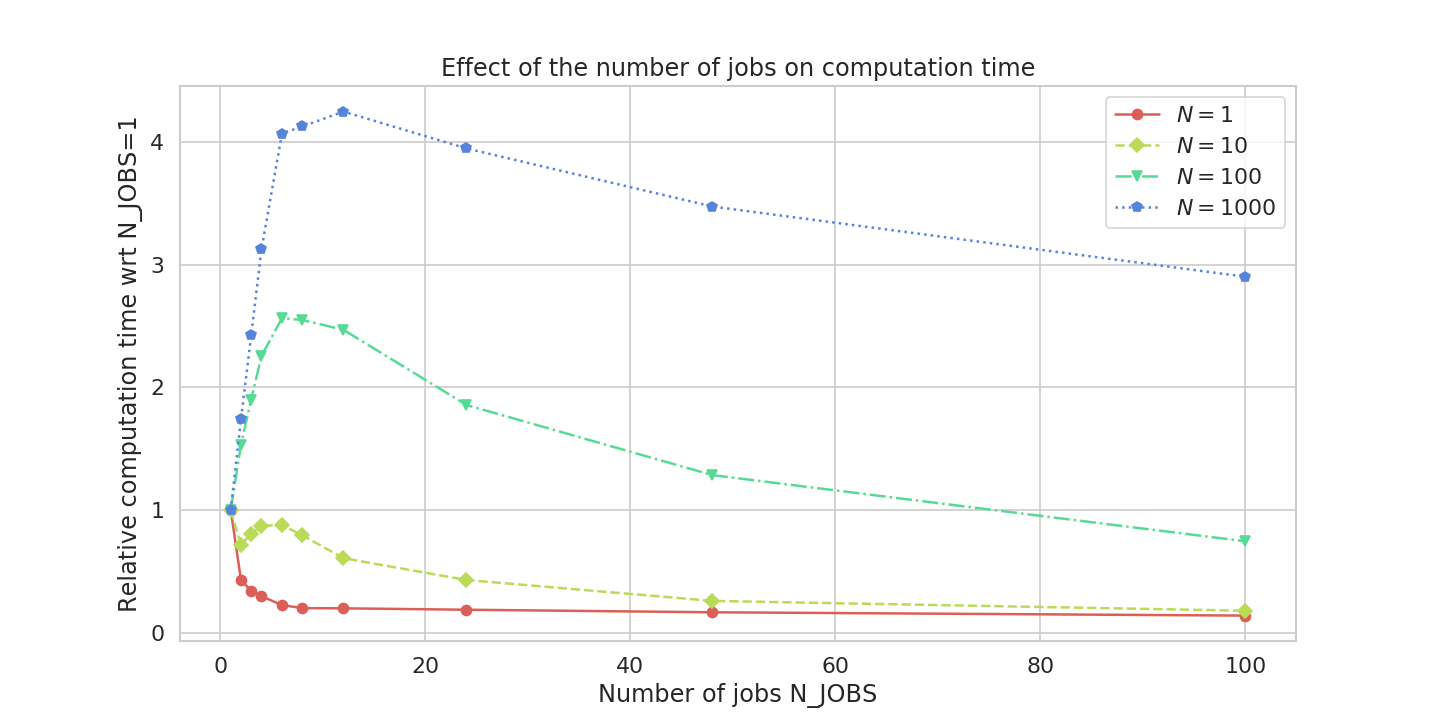

In [25]:
plotData(normalize=True)

In [27]:
!ls -larth

total 1,3M
-rw-r--r-- 1 lilian lilian 1,3K mai    3 12:08   extract_data_from_logs.sh
-rw-r--r-- 1 lilian lilian  429 mai    3 14:53   extract_data_from_hdf5.py
-rwxr-xr-x 1 lilian lilian 1,9K mai   10 22:48   launch_simulations.sh
drwxr-xr-x 6 lilian lilian 4,0K juin   7 15:14   ..
-rw-rw-r-- 1 lilian lilian 2,5K juin  19 16:13   data_190619.txt
-rw-r--r-- 1 lilian lilian 948K juin  19 16:16   Analyze_data.ipynb
drwxrwxr-x 2 lilian lilian 4,0K juin  19 16:16   .ipynb_checkpoints
-rw-rw-r-- 1 lilian lilian  19K juin  19 16:22   analyze_speedup_as_nb_of_jobs.pdf
-rw-rw-r-- 1 lilian lilian  64K juin  19 16:22   analyze_speedup_as_nb_of_jobs.png
-rw-rw-r-- 1 lilian lilian  18K juin  19 16:26   analyze_speedup_as_nb_of_jobs_normalize.pdf
-rw-rw-r-- 1 lilian lilian  69K juin  19 16:26   analyze_speedup_as_nb_of_jobs_normalize.png
-rw-rw-r-- 1 lilian lilian 152K juin  19 16:26   Analyze_logs_data_speedup_factor.ipynb
drwxr-xr-x 3 lilian lilian  12K juin  19 16:26   .


In [28]:
pwd

'/home/lilian/ownCloud/owncloud.crans.org/Crans/These_2016-17/reports/phd-thesis.git/2-Chapters/3-Chapter/logs'